In [2]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

print(train_df.columns.values)

train_df.info()
print('_'*40)
test_df.info()

train_df.describe()

# train_df.describe(include=['0'])

train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

g = sns.FacetGrid(train_df, col='Survived')
# Survived 기준으로 히스토그램 두개 만듦
g.map(plt.hist, 'Age', bins = 20)

grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height = 2.2, aspect = 1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

print('Before', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df,test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)
    
pd.crosstab(train_df['Title'], train_df['Sex'])

for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col',\
                                                'Don','Dr','Major','Rev','Sir','Jonkheer','Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Ms','Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')
    
train_df[['Title','Survived']].groupby(['Title'], as_index=False).mean()

title_mapping = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':1, 'male':0}).astype(int)

train_df.head()

grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

guess_ages = np.zeros((2,3))
# 이게 무슨 함수지?
guess_ages

for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                               (dataset['Pclass'] == j+1)]['Age'].dropna()
            age_guess = guess_df.median()
            guess_ages[i,j] = int(age_guess/0.5 + 0.5) * 0.5
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1), \
                       'Age'] = guess_ages[i,j]
    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean()\
.sort_values(by='AgeBand', ascending=True)

for dataset in combine:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[dataset['Age'] > 64, 'Age']
train_df.head()

train_df = train_df.drop(['AgeBand'], axis = 1)
combine = [train_df, test_df]
train_df.head()

for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index = False).mean()\
.sort_values(by='Survived', ascending=False)

for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index = False).mean()

train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()\
.sort_values(by='Survived', ascending=False)

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2}).astype(int)
train_df.head()

test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index = False).mean()\
.sort_values(by='FareBand', ascending = True)

for dataset in combine:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31.0), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 31.0, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

train_df.head(10)

test_df.head(10)

X_train = train_df.drop('Survived', axis = 1)
Y_train = train_df['Survived']
X_test = test_df.drop('PassengerId', axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) *  100, 2)
acc_log

coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)



FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [ ]:
%pip install --upgrade scikit-learn

     ---------------------------------------- 7.5/7.5 MB 8.3 MB/s eta 0:00:00
     ---------------------------------------- 14.6/14.6 MB 5.2 MB/s eta 0:00:00
     ---------------------------------------- 40.1/40.1 MB 4.7 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 4.6 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: C:\Users\YHS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

print('클래스 레이블:', np.unique(y))

클래스 레이블: [0 1 2]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 1, stratify = y)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
!pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 8.1 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 kB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 9.2 MB/s eta 0:00:00
     -------------------------------------- 965.4/965.4 kB 6.1 MB/s eta 0:00:00
     -------------------------------------- 163.6/163.6 kB 3.3 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: C:\Users\YHS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_region(X, y, classifier, test_idx=None, resolution=0.02):
    marker = ('s','x', 'o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),\
        np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=marker[idx],
                    label=cl,
                    edgecolor=None if idx==1 else 'black')
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    facecolor = 'none',
                    edgecolor = 'black',
                    alpha = 1.0,
                    linewidth = 1,
                    marker = 'o',
                    s = 100,
                    label = 'test set')

In [ ]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

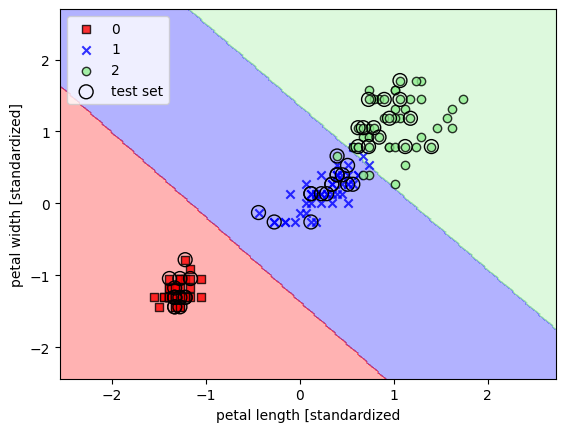

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_region(X_combined_std,
                    y_combined,
                    classifier=svm,
                    test_idx = range(105,150))
plt.xlabel('petal length [standardized')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout
plt.show()

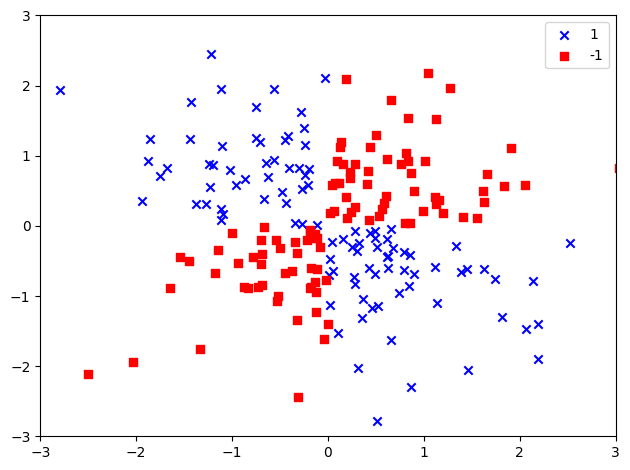

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                        X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c = 'b', marker='x',
            label = '1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c = 'r', marker = 's', label='-1')

plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

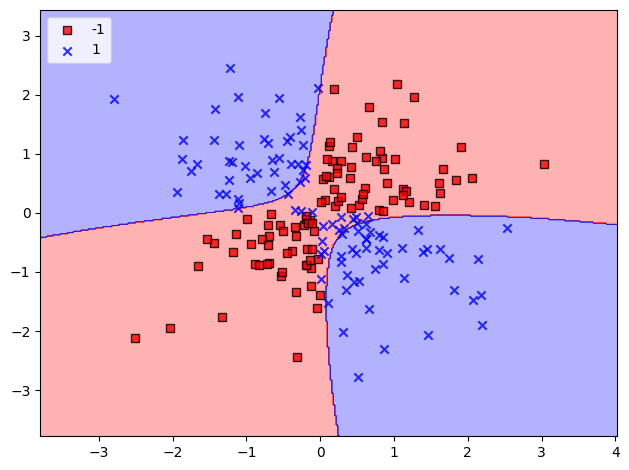

In [ ]:
svm = SVC(kernel = 'rbf', random_state = 1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_region(X_xor, y_xor,
                    classifier = svm)

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

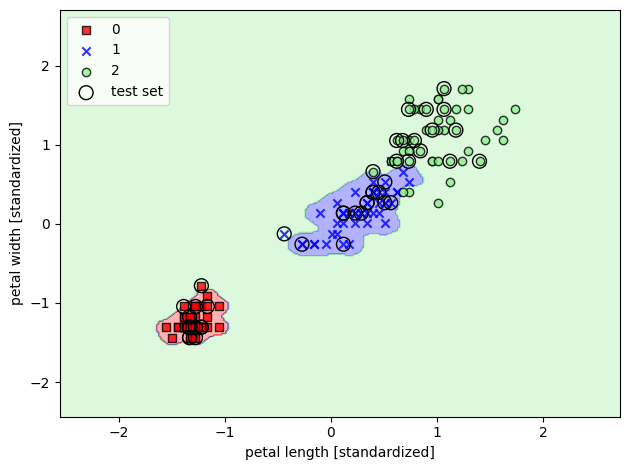

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=100, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_region(X_combined_std, y_combined,
                    classifier=svm, test_idx = range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
!pip install pandas

     ---------------------------------------- 10.4/10.4 MB 5.7 MB/s eta 0:00:00
     -------------------------------------- 498.1/498.1 kB 2.4 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: C:\Users\YHS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
# 데이터 불러오기
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [ ]:

# 데이터 preview
fish.head(10)


,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
5,Bream,450.0,29.7,34.7,13.6024,4.9274
6,Bream,500.0,29.7,34.5,14.1795,5.2785
7,Bream,390.0,30.0,35.0,12.6700,4.6900
8,Bream,450.0,30.0,35.1,14.0049,4.8438
9,Bream,500.0,30.7,36.2,14.2266,4.9594


In [ ]:

### 훈련 데이터와 테스트 데이터 나누기

# 어떤 종의 생선이 있을까?
# hint : unique()
fish['Species'].unique()


array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [ ]:

#1. 타깃을 제외한 나머지 컬럼을 입력 데이터로 만든다.

# input 데이터 생성
# hint : to_numpy()사용
fish_input= fish[fish.columns[1:]].to_numpy()
fish_input


array([[2.42000e+02, 2.54000e+01, 3.00000e+01, 1.15200e+01, 4.02000e+00],
       [2.90000e+02, 2.63000e+01, 3.12000e+01, 1.24800e+01, 4.30560e+00],
       [3.40000e+02, 2.65000e+01, 3.11000e+01, 1.23778e+01, 4.69610e+00],
       [3.63000e+02, 2.90000e+01, 3.35000e+01, 1.27300e+01, 4.45550e+00],
       [4.30000e+02, 2.90000e+01, 3.40000e+01, 1.24440e+01, 5.13400e+00],
       [4.50000e+02, 2.97000e+01, 3.47000e+01, 1.36024e+01, 4.92740e+00],
       [5.00000e+02, 2.97000e+01, 3.45000e+01, 1.41795e+01, 5.27850e+00],
       [3.90000e+02, 3.00000e+01, 3.50000e+01, 1.26700e+01, 4.69000e+00],
       [4.50000e+02, 3.00000e+01, 3.51000e+01, 1.40049e+01, 4.84380e+00],
       [5.00000e+02, 3.07000e+01, 3.62000e+01, 1.42266e+01, 4.95940e+00],
       [4.75000e+02, 3.10000e+01, 3.62000e+01, 1.42628e+01, 5.10420e+00],
       [5.00000e+02, 3.10000e+01, 3.62000e+01, 1.43714e+01, 4.81460e+00],
       [5.00000e+02, 3.15000e+01, 3.64000e+01, 1.37592e+01, 4.36800e+00],
       [3.40000e+02, 3.20000e+01, 3.73

In [ ]:

# 2. 타깃 데이터를 출력 데이터로 만든다.

# output 데이터 생성
fish_output= fish[fish.columns[0]].to_numpy()
fish_output


array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Whitefish',
       'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perc

In [ ]:

# 3. 훈련 데이터 (input data)와 테스트 데이터 (output data) 나누기 

from sklearn.model_selection import train_test_split
# random_state=42 지정한다

train_input, test_input = train_test_split(fish_input, random_state=42, test_size=0.3, stratify=fish_output)
train_target, test_target = train_test_split(fish_output, random_state=42, test_size=0.3, stratify=fish_output)

train_input

array([[4.30000e+02, 2.90000e+01, 3.40000e+01, 1.24440e+01, 5.13400e+00],
       [1.10000e+02, 2.20000e+01, 2.35000e+01, 5.52250e+00, 3.99500e+00],
       [1.60000e+02, 2.25000e+01, 2.53000e+01, 7.03340e+00, 3.82030e+00],
       [6.00000e+01, 1.55000e+01, 1.74000e+01, 6.57720e+00, 2.31420e+00],
       [7.00000e+02, 3.30000e+01, 3.83000e+01, 1.48604e+01, 5.28540e+00],
       [4.00000e+01, 1.50000e+01, 1.60000e+01, 3.82400e+00, 2.43200e+00],
       [7.00000e+02, 3.30000e+01, 3.85000e+01, 1.49380e+01, 5.19750e+00],
       [2.50000e+02, 2.75000e+01, 2.89000e+01, 7.28280e+00, 4.56620e+00],
       [6.70000e+00, 9.80000e+00, 1.08000e+01, 1.73880e+00, 1.04760e+00],
       [2.42000e+02, 2.54000e+01, 3.00000e+01, 1.15200e+01, 4.02000e+00],
       [9.25000e+02, 3.95000e+01, 4.53000e+01, 1.87542e+01, 6.74970e+00],
       [5.40000e+02, 3.10000e+01, 3.40000e+01, 1.07440e+01, 6.56200e+00],
       [2.70000e+02, 2.65000e+01, 2.93000e+01, 8.14540e+00, 4.24850e+00],
       [1.55000e+03, 6.00000e+01, 6.40

In [ ]:

### 훈련데이터와 테스트 데이터 세트를 표준화 전처리

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)


In [ ]:

### 확률적경사 하강법

from sklearn.linear_model import SGDClassifier

# 사이킷런 1.1.0 버전 이하일 경우 'log_loss'를 'log'로 바꾸어 주세요.
# Q1. 로지스틱 손실 함수 지정
# Q2. 에포크 횟수 10회 지정
# random_state=42로 지정한다 -> ??
sc = SGDClassifier(loss = 'log_loss', max_iter=10)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))


0.7297297297297297
0.5833333333333334


C:\Users\YHS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:

#1. 10회의 결과값이 별로 좋지 않습니다. 더 훈련 시켜볼까요?

sc = SGDClassifier(loss = 'log_loss', max_iter=100)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))


0.8558558558558559
0.6875


In [ ]:

###  에포크와 과대/과소적합

import numpy as np
sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

# 300번의 에포크 동안 훈련을 반복하여 진행해보기 
# * 반복마다 훈련 세트와 테스트 세트의 점수를 계산하여 train_score,test_score 리스트에 추가

for i in range(300):
    sc.partial_fit(train_scaled, train_target, classes=classes) # partial_fit은 생각지도 못했네
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))


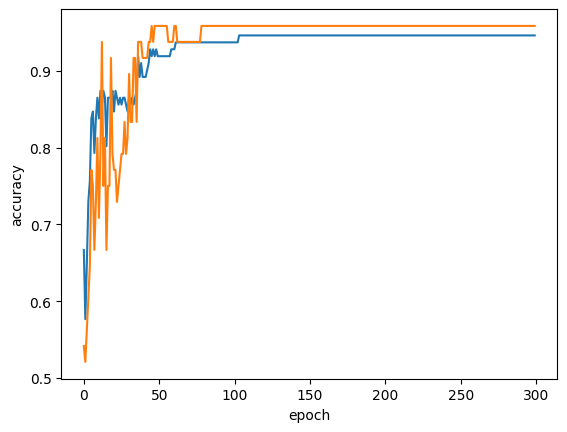

In [ ]:

# 시각화

import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()


In [ ]:

# mission
# * SGDClassifier의 반복 횟수를 100에 맞추고 다시 훈련시키기
# * 최종적으로 훈련 세트와 테스트 세트 점수 출력하기

sc = SGDClassifier(loss = 'log_loss', max_iter=100)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))


0.8378378378378378
0.6666666666666666


In [ ]:
import sys
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
# from utils import read_data, plot_data, plot_decision_function


In [ ]:

red_RGB = (1, 0, 0)
blue_RGB = (0, 0, 1)
data_colors = [red_RGB, blue_RGB]

def read_points_file(filename):
    points = []
    with open(filename, "r") as f:
        for point in f:
            point = point.strip("\n").split()
            points.append([float(point[0]), float(point[1])])
    return points

def read_data(class_0_file, class_1_file):
    points_label0 = read_points_file(class_0_file)
    points_label1 = read_points_file(class_1_file)
    points = points_label0 + points_label1
    points = np.array(points)
    
    label0, label1 = [0], [1]
    num_of_label0, num_of_label1 = len(points_label0), len(points_label1)
    labels = label0 * num_of_label0 + label1 * num_of_label1
    
    return (points, labels)


def plot_data(X_train, y_train, X_test, y_test):
  
    X = np.concatenate((X_train, X_test))
    y = np.concatenate((y_train, y_test))

    colors = get_colors(y)
    colors_train = get_colors(y_train)
    colors_test = get_colors(y_test)

    plt.figure(figsize=(12, 4), dpi=150)

    # Plot all data plot
    plt.subplot(131)
    plt.axis('equal')
    plt.scatter(X[:, 0], X[:, 1], c=colors, s=10, edgecolors=colors)
    plt.title("Data (100%)")


    # training data plot
    plt.subplot(132)
    plt.axis('equal')
    #plt.axis('off')
    plt.scatter(X_train[:, 0], X_train[:, 1], c = colors_train, s = 10, edgecolors=colors_train)
    plt.title("Training Data (80%)")

    # testing data plot
    plt.subplot(133)
    plt.axis('equal')
    #plt.axis('off')
    plt.scatter(X_test[:, 0], X_test[:, 1], c = colors_test, s = 10, edgecolors=colors_test)
    plt.title("Test Data (20%)")
    plt.tight_layout()
    plt.show()

def get_colors(y):
    return [data_colors[label] for label in y]

def plot_decision_function(X_train, y_train, X_test, y_test, clf):
    plt.figure(figsize=(8, 4), dpi=150)
    plt.subplot(121)
    plt.title("Training data")
    plot_decision_function_helper(X_train, y_train, clf)
    plt.subplot(122)
    plt.title("Test data")
    plot_decision_function_helper(X_test, y_test, clf, True)
    plt.show()


def plot_decision_function_helper(X, y, clf, show_only_decision_function = False):

    colors = get_colors(y)
    plt.axis('equal')
    plt.tight_layout()
    #plt.axis('off')

    plt.scatter(X[:, 0], X[:, 1], c=colors, s=10, edgecolors=colors)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T # xy.shape = (900, 2)
    Z = clf.decision_function(xy).reshape(XX.shape)
    # clf.decision_function(xy).shape = (900,)
    # Z.shape = (30, 30)

    if  show_only_decision_function:
    # Plot decision boundary
        ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
                 linestyles=['-'])
    else :
    # Plot decision boundary and margins
        ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                 linestyles=['--', '-', '--'])
    # Plot support vectors
    #ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 10,
    #         linewidth=1, facecolors='k', c = 'k', label='Support Vectors')

    #plt.legend(fontsize='small')


In [ ]:

# Linearly Separable Data Without Noise

# Read data
x, labels = "http://localhost:8888/edit/0MLDL%EC%8A%A4%ED%84%B0%EB%94%94/points_class_0.txt", "http://localhost:8888/edit/0MLDL%EC%8A%A4%ED%84%B0%EB%94%94/points_class_1.txt"


In [ ]:

# Split data to train and test on 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(x, labels, test_size = 0.2, random_state=0)

print("Displaying data. Close window to continue.")


Displaying data. Close window to continue.


In [ ]:
# Plot data
plot_data(X_train, y_train, X_test, y_test)

# make a classifier and fit on training data
clf_1 = svm.SVC(kernel='linear', C=1)
clf_1.fit(X_train, y_train)

print("Display decision function (C=1) ...\nThe SVM classifier will choose a large margin decision boundary at the expense of larger number of misclassifications")
# Plot decision function on training and test data
plot_decision_function(X_train, y_train, X_test, y_test, clf_1)

# make a classifier and fit on training data
clf_100 = svm.SVC(kernel='linear', C=100)
clf_100.fit(X_train, y_train)

print("Accuracy(C=1): {}%".format(clf_1.score(X_test, y_test) * 100 ))
print("\n")
print("Display decision function (C=100) ...\nThe classifier will choose a low margin decision boundary and try to minimize the misclassifications")
# Plot decision function on training and test data
plot_decision_function(X_train, y_train, X_test, y_test, clf_100)

print("Accuracy(C=100): {}%".format(clf_100.score(X_test, y_test) * 100 ))

# Make predictions on unseen test data
clf_1_predictions = clf_1.predict(X_test)
clf_100_predictions = clf_100.predict(X_test)


TypeError: list indices must be integers or slices, not numpy.str_

In [ ]:

# Nonlinear Data

# Read data
x, labels = read_data("points_class_0_nonLinear.txt", "points_class_1_nonLinear.txt")

# Split data to train and test on 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(x, labels, test_size = 0.2, random_state=0)

print("Displaying data.")
# Plot data 
plot_data(X_train, y_train, X_test, y_test)

print("Training SVM ...")
# make a classifier
[                                   ]

# Train classifier
clf.fit(X_train, y_train)

# Make predictions on unseen test data
clf_predictions = clf.predict(X_test)

print("Displaying decision function.")
# Plot decision function on training and test data
plot_decision_function(X_train, y_train, X_test, y_test, clf)

# Grid Search
print("Performing grid search ... ")

# Parameter Grid
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10]}

# Make grid search classifier
clf_grid = GridSearchCV(svm.SVC(), param_grid, verbose=1)

# Train the classifier
clf_grid.fit(X_train, y_train)

# clf = grid.best_estimator_()
print("Best Parameters:\n", clf_grid.best_params_)
print("Best Estimators:\n", clf_grid.best_estimator_)

print("Displaying decision function for best estimator.")
# Plot decision function on training and test data
plot_decision_function(X_train, y_train, X_test, y_test, clf_grid)



## 6강 교재 코드 실습

In [ ]:
%pip install --upgrade scikit-learn


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: C:\Users\YHS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
from IPython.display import Image


## 파이프라인을 사용한 효율적인 워크플로
### 위스콘신 유방암 데이터셋


In [ ]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)


In [ ]:

# UCI 머신 러닝 저장소에서 유방암 데이터셋을 다운로드할 수 없을 때
# 다음 주석을 해제하고 로컬 경로에서 데이터셋을 적재하세요:

# df = pd.read_csv('wdbc.data', header=None)


In [ ]:

df.head()


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.shape


(569, 32)

In [ ]:
from sklearn.preprocessing import LabelEncoder

X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_


array(['B', 'M'], dtype=object)

In [ ]:
le.transform(['M', 'B'])

array([1, 0])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.20,
                     stratify=y,
                     random_state=1)


In [ ]:

## 파이프라인으로 변환기와 추정기 연결
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(random_state=1))

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('테스트 정확도: %.3f' % pipe_lr.score(X_test, y_test))


테스트 정확도: 0.956


In [ ]:
import matplotlib.pyplot as plt
from sklearn import set_config
set_config(display='diagram')
pipe_lr


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('logisticregression', LogisticRegression(random_state=1))])

In [ ]:
Image(url='https://git.io/JtsTr', width=500) 


## k-겹 교차 검증을 사용한 모델 성능 평가
### 홀드아웃 방법


In [ ]:
Image(url='https://git.io/JtsTo', width=500) 


### K-겹 교차 검증


In [ ]:
Image(url='https://git.io/JtsT6', width=500) 


In [ ]:

import numpy as np
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)

scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('폴드: %2d, 클래스 분포: %s, 정확도: %.3f' % (k+1,
          np.bincount(y_train[train]), score))
    
print('\nCV 정확도: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


폴드:  1, 클래스 분포: [256 153], 정확도: 0.935
폴드:  2, 클래스 분포: [256 153], 정확도: 0.935
폴드:  3, 클래스 분포: [256 153], 정확도: 0.957
폴드:  4, 클래스 분포: [256 153], 정확도: 0.957
폴드:  5, 클래스 분포: [256 153], 정확도: 0.935
폴드:  6, 클래스 분포: [257 153], 정확도: 0.956
폴드:  7, 클래스 분포: [257 153], 정확도: 0.978
폴드:  8, 클래스 분포: [257 153], 정확도: 0.933
폴드:  9, 클래스 분포: [257 153], 정확도: 0.956
폴드: 10, 클래스 분포: [257 153], 정확도: 0.956

CV 정확도: 0.950 +/- 0.014


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print('CV 정확도 점수: %s' % scores)
print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


CV 정확도 점수: [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]
CV 정확도: 0.950 +/- 0.014


In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(estimator=pipe_lr, 
                        X=X_train, 
                        y=y_train, 
                        scoring=['accuracy'], 
                        cv=10, 
                        n_jobs=-1)
print('CV 정확도 점수: %s' % scores['test_accuracy'])
print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']), 
                                 np.std(scores['test_accuracy'])))

CV 정확도 점수: [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]
CV 정확도: 0.950 +/- 0.014




`cross_val_predict` 함수는 `cross_val_score`와 비슷한 인터페이스를 제공하지만 훈련 데이터셋의 각 샘플이 테스트 폴드가 되었을 때 만들어진 예측을 반환합니다. 따라서 `cross_val_predict` 함수의 결과를 사용해 모델의 성능(예를 들어, 정확도)을 계산하면 `cross_val_score` 함수의 결과와 다르며 바람직한 일반화 성능 추정이 아닙니다. `cross_val_predict` 함수의 사용 용도는 훈련 세트에 대한 예측 결과를 시각화하거나 7장에서 소개하는 스태킹(Stacking) 앙상블(Ensemble) 방법처럼 다른 모델에 주입할 훈련 데이터를 만들기 위해 사용합니다.


In [ ]:
from sklearn.model_selection import cross_val_predict

preds = cross_val_predict(estimator=pipe_lr,
                          X=X_train, 
                          y=y_train,
                          cv=10, 
                          n_jobs=-1)
preds[:10]


array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

`method` 매개변수에 반환될 값을 계산하기 위한 모델의 메서드를 지정할 수 있습니다. 예를 들어 `method='predict_proba'`로 지정하면 예측 확률을 반환합니다. `‘predict’`, `‘predict_proba’`, `‘predict_log_proba’`, `‘decision_function’` 등이 가능하며 기본값은 `'predict'`입니다.


In [ ]:
from sklearn.model_selection import cross_val_predict

preds = cross_val_predict(estimator=pipe_lr,
                          X=X_train, 
                          y=y_train,
                          cv=10, 
                          method='predict_proba', 
                          n_jobs=-1)
preds[:10]


array([[9.93982352e-01, 6.01764759e-03],
       [7.64328337e-01, 2.35671663e-01],
       [9.72683946e-01, 2.73160539e-02],
       [8.41658121e-01, 1.58341879e-01],
       [9.97144940e-01, 2.85506043e-03],
       [9.99803660e-01, 1.96339882e-04],
       [9.99324159e-01, 6.75840609e-04],
       [2.12145074e-06, 9.99997879e-01],
       [1.28668437e-01, 8.71331563e-01],
       [7.76260670e-04, 9.99223739e-01]])


## 학습 곡선과 검증 곡선을 사용한 알고리즘 디버깅
### 학습 곡선으로 편향과 분산 문제 분석


In [ ]:
Image(url='https://git.io/JtsTi', width=600) 


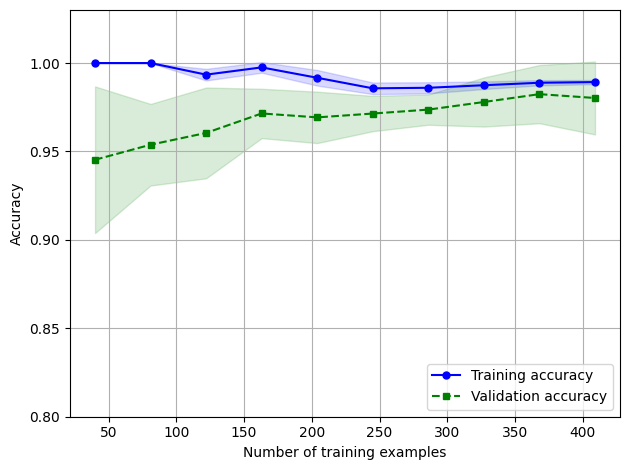

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', random_state=1,
                                           max_iter=10000))

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
# plt.savefig('images/06_05.png', dpi=300)
plt.show()



### 검증 곡선으로 과대적합과 과소적합 조사


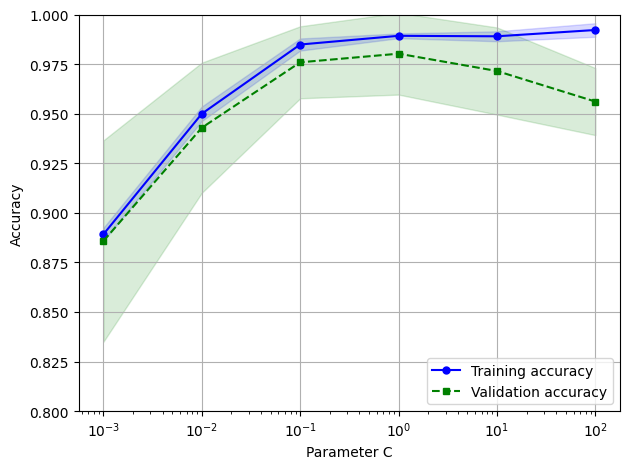

In [ ]:
from sklearn.model_selection import validation_curve


param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                estimator=pipe_lr, 
                X=X_train, 
                y=y_train, 
                param_name='logisticregression__C', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
# plt.savefig('images/06_06.png', dpi=300)
plt.show()



## 그리드 서치를 사용한 머신 러닝 모델 세부 튜닝
### 그리드 서치를 사용한 하이퍼파라미터 튜닝


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range, 
               'svc__kernel': ['linear']},
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  refit=True,
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)


0.9846859903381642
{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [ ]:
clf = gs.best_estimator_
# refit=True로 지정했기 때문에 다시 fit() 메서드를 호출할 필요가 없습니다.
# clf.fit(X_train, y_train)

print('테스트 정확도: %.3f' % clf.score(X_test, y_test))


테스트 정확도: 0.974


`GridSearchCV` 클래스와 `cross_valiate` 함수에서 `return_train_score` 매개변수를 `True`로 지정하면 훈련 폴드에 대한 점수를 계산하여 반환합니다. 훈련 세트에 대한 점수를 보고 과대적합과 과소적합에 대한 정보를 얻을 수 있지만 실행 시간이 오래 걸릴 수 있습니다. `param_range`에 8개의 값이 지정되어 있기 때문에 `SVC` 모델은 `'linear'` 커널에 대해 8번, `'rbf'` 커널에 대해 64번 교차 검증이 수행됩니다. 따라서 훈련 폴드마다 반환되는 점수는 총 72개입니다. 이 값은 `GridSearchCV` 클래스의 `cv_results_` 딕셔너리 속성에 split{폴드번호}_train_score 와 같은 키에 저장되어 있습니다. 예를 들어 첫 번째 폴드의 점수는 `'split0_train_score'` 키로 저장되어 있습니다.


In [ ]:
gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  return_train_score=True,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
gs.cv_results_['split0_train_score']


array([0.6405868 , 0.93643032, 0.97555012, 0.98777506, 0.98533007,
       0.99266504, 0.99755501, 1.        , 0.62591687, 0.62591687,
       0.62591687, 0.62591687, 0.62591687, 0.62591687, 0.62591687,
       0.62591687, 0.62591687, 0.62591687, 0.62591687, 0.62591687,
       0.62591687, 0.62591687, 0.62591687, 0.62591687, 0.62591687,
       0.62591687, 0.62591687, 0.62591687, 0.62591687, 0.62591687,
       0.62591687, 0.62591687, 0.62591687, 0.7799511 , 0.94621027,
       0.96577017, 0.62591687, 0.62591687, 0.62591687, 0.62591687,
       0.78484108, 0.94621027, 0.9804401 , 0.99266504, 1.        ,
       1.        , 1.        , 1.        , 0.94621027, 0.97799511,
       0.99266504, 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.97799511, 0.98777506, 0.99511002, 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.98533007,
       0.99266504, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

전체 훈련 점수의 평균 값은 `'mean_train_score'` 키에 저장되어 있습니다.
gs.cv_results_['mean_train_score']
비슷하게 첫 번째 폴드에 대한 테스트 점수는 `'split0_test_score'` 키에 저장되어 있습니다.
gs.cv_results_['split0_test_score']


`GridSearchCV` 클래스의 객체에서도 최종 모델의 `score`, `predict`, `transform` 메서드를 바로 호출할 수 있습니다.


In [ ]:
print('테스트 정확도: %.3f' % gs.score(X_test, y_test))


테스트 정확도: 0.974


매개변수 탐색 범위가 넓거나 규제 매개변수 `C`와 같이 연속적인 값을 탐색해야 하는 경우에 `RandomizedSearchCV`가 더 효율적입니다. 이 클래스는 `n_iter` 매개변수로 탐색 횟수를 조정할 수 있어 컴퓨팅 자원에 맞게 탐색을 실행할 수 있습니다. `GridSearchCV` 클래스에는 탐색할 매개변수 값을 리스트로 전달했습니다. `RandomizedSearchCV`에는 샘플링 가능한 분포를 지정해야 합니다. 예를 들면 `scipy.stats.uniform`, `scipy.stats.randint` 객체 등이 있습니다. 사이킷런 0.22 버전에서 `scipy.stats.reciprocal`을 사용한 로그 균등 분포(log-uniform distribution) 클래스 `loguniform`을 제공합니다.

다음 예에서 그리드 서치에서 사용한 것과 동일한 범위로 매개변수 `C`를 탐색해 보겠습니다. 대신 여기에서는 탐색 횟수를 30회로 줄여서 수행합니다.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.fixes import loguniform

distribution =  loguniform(0.0001, 1000.0)

param_dist = [{'svc__C': distribution, 
               'svc__kernel': ['linear']},
              {'svc__C': distribution, 
               'svc__gamma': distribution, 
               'svc__kernel': ['rbf']}]

rs = RandomizedSearchCV(estimator=pipe_svc,
                        param_distributions=param_dist,
                        n_iter=30,
                        cv=10,
                        random_state=1,
                        n_jobs=-1)
rs = rs.fit(X_train, y_train)
print(rs.best_score_)
print(rs.best_params_)


0.9824637681159419
{'svc__C': 210.6644070836221, 'svc__gamma': 0.0006861724481510375, 'svc__kernel': 'rbf'}


결과에서 알 수 있듯이 `RandomizedSearchCV`의 탐색 횟수는 절반 이상 적지만 거의 비슷한 성능을 내는 매개변수 조합을 찾았습니다.



### 중첩 교차 검증을 사용한 알고리즘 선택


In [ ]:
Image(url='https://git.io/JtsTP', width=500) 


In [ ]:
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=2)

scores = cross_val_score(gs, X_train, y_train, 
                         scoring='accuracy', cv=5)
print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))


CV 정확도: 0.974 +/- 0.015


In [ ]:
from sklearn.tree import DecisionTreeClassifier

gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],
                  scoring='accuracy',
                  cv=2)

scores = cross_val_score(gs, X_train, y_train, 
                         scoring='accuracy', cv=5)
print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores), 
                                      np.std(scores)))


CV 정확도: 0.934 +/- 0.016



## 여러 가지 성능 평가 지표
### 오차 행렬


In [ ]:
Image(url='https://git.io/JtsT1', width=300) 


In [ ]:
from sklearn.metrics import confusion_matrix

pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)


[[71  1]
 [ 2 40]]


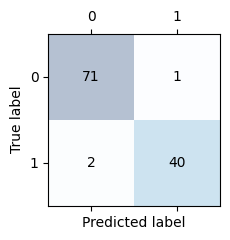

In [ ]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
# plt.savefig('images/06_09.png', dpi=300)
plt.show()


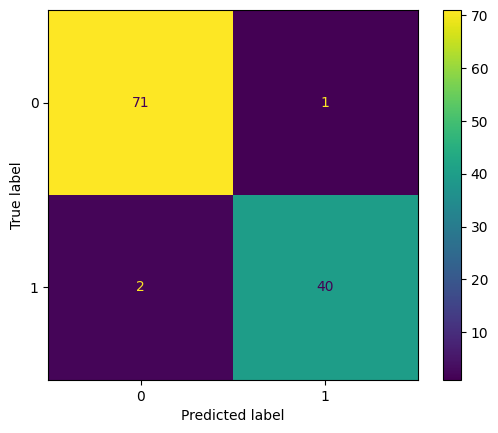

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(pipe_svc, X_test, y_test)
plt.show()


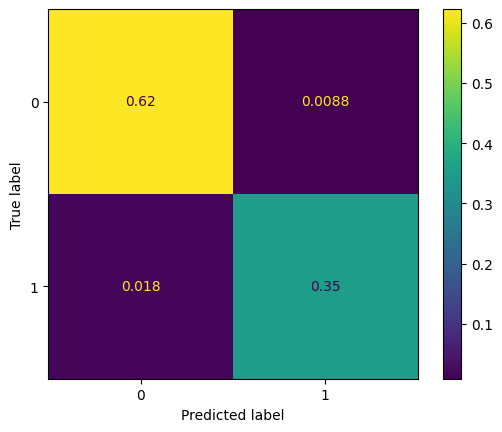

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipe_svc, X_test, y_test, normalize='all')
plt.show()


### 추가 노트
앞서 클래스 레이블을 인코딩했기 때문에 *악성(malignant)* 종양이 "양성" 클래스(1), *양성(benign)* 종양이 "음성" 클래스(0)입니다:
le.transform(['M', 'B'])
그리고 다음처럼 오차 행렬을 출력했습니다:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)
클래스 0으로 올바르게 예측된 (진짜) 클래스 0 샘플(진짜 음성)이 행렬의 왼쪽 위에 있는 값입니다(인덱스 0,0). 진짜 음성이 오른쪽 아래(인덱스 1,1)에 있고 진짜 양성이 왼쪽 위에 있도록 순서를 바꾸려면 다음처럼 `labels` 매개변수를 사용합니다:


In [ ]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=[1, 0])
print(confmat)


결론:

이 예에서 클래스 1(악성 종양)이 양성 클래스입니다. 모델은 71개의 샘플을 정확하게 클래스 0(진짜 음성)으로 분류했습니다. 40개의 샘플은 클래스 1(진짜 양성)로 올바르게 분류했습니다. 클래스 1에 해당하는 두 개의 샘플을 클래스 0(가짜 음성)으로 잘못 분류했고 양성 종양인 하나의 샘플을 악성 종양(가짜 양성)으로 잘못 분류했습니다.



## 분류 모델의 정밀도와 재현율 최적화


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('정밀도: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('재현율: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))


정밀도: 0.976
재현율: 0.952
F1: 0.964


In [ ]:
from sklearn.metrics import make_scorer

scorer = make_scorer(f1_score, pos_label=0)

c_gamma_range = [0.01, 0.1, 1.0, 10.0]

param_grid = [{'svc__C': c_gamma_range,
               'svc__kernel': ['linear']},
              {'svc__C': c_gamma_range,
               'svc__gamma': c_gamma_range,
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring=scorer,
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)


0.9861994953378878
{'svc__C': 10.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}



## ROC 곡선 그리기


C:\Users\YHS\AppData\Local\Temp\ipykernel_9844\1347203472.py:6: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if scipy_version >= Version('1.4.1'):


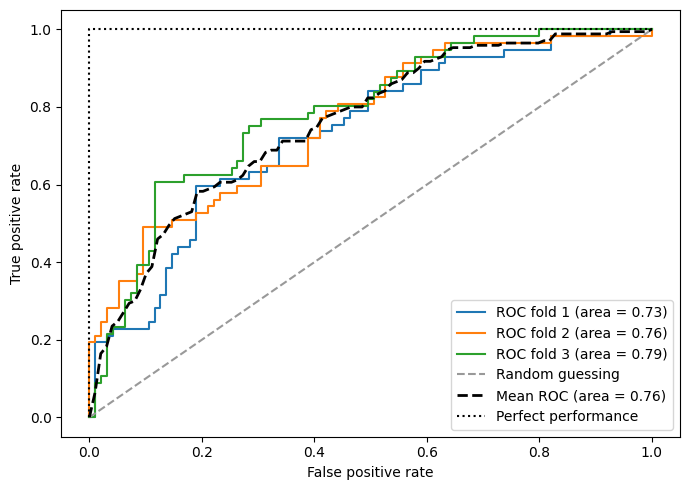

In [ ]:
from sklearn.metrics import roc_curve, auc
from distutils.version import LooseVersion as Version
from scipy import __version__ as scipy_version


if scipy_version >= Version('1.4.1'):
    from numpy import interp
else:
    from scipy import interp


pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(penalty='l2', 
                                           random_state=1,
                                           C=100.0))

X_train2 = X_train[:, [4, 14]]
    

cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train],
                         y_train[train]).predict_proba(X_train2[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
# plt.savefig('images/06_10.png', dpi=300)
plt.show()


사이킷런 0.22 버전에서 `plot_roc_curve()` 함수와 `plot_precision_recall_curve()` 함수를 사용하면 ROC 곡선과 정밀도-재현율 곡선을 쉽게 그릴 수 있습니다.


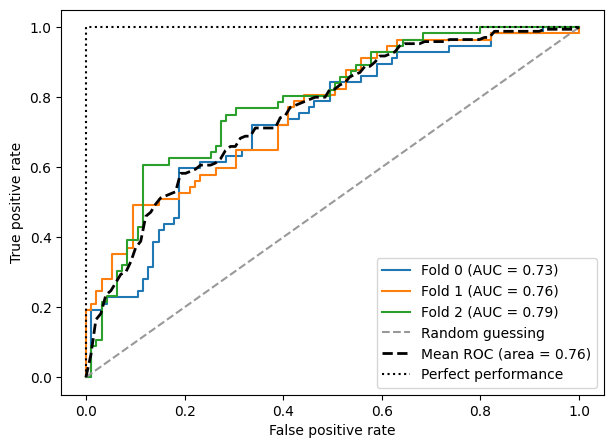

In [ ]:
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

for i, (train, test) in enumerate(cv):
    pipe_lr.fit(X_train2[train], y_train[train])
    roc_disp = RocCurveDisplay.from_estimator(pipe_lr, 
                                            X_train2[test], y_train[test], 
                                            name=f'Fold {i}', ax=ax)
    mean_tpr += interp(mean_fpr, roc_disp.fpr, roc_disp.tpr)
    mean_tpr[0] = 0.0

plt.plot([0, 1], [0, 1],
         linestyle='--', color=(0.6, 0.6, 0.6),
         label='Random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.plot([0, 0, 1], [0, 1, 1],
         linestyle=':', color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
# plt.savefig('images/06_plot_roc_curve.png', dpi=300)
plt.show()


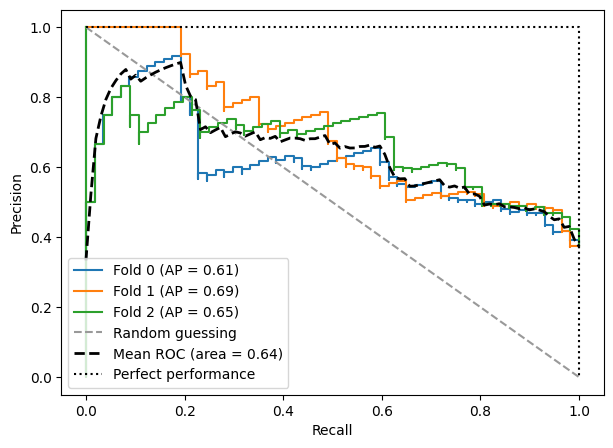

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

fig, ax = plt.subplots(figsize=(7, 5))

mean_precision = 0.0
mean_recall = np.linspace(0, 1, 100)

for i, (train, test) in enumerate(cv):
    pipe_lr.fit(X_train2[train], y_train[train])
    pr_disp = PrecisionRecallDisplay.from_estimator(
        pipe_lr, X_train2[test], y_train[test], 
        name=f'Fold {i}', ax=ax)
    mean_precision += interp(mean_recall, pr_disp.recall[::-1], 
                             pr_disp.precision[::-1])

plt.plot([0, 1], [1, 0],
         linestyle='--', color=(0.6, 0.6, 0.6),
         label='Random guessing')

mean_precision /= len(cv)
mean_auc = auc(mean_recall, mean_precision)
plt.plot(mean_recall, mean_precision, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.plot([0, 1, 1], [1, 1, 0],
         linestyle=':', color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower left")
# plt.savefig('images/06_plot_precision_recall_curve.png', dpi=300)
plt.show()



## 다중 분류의 성능 지표


In [ ]:
pre_scorer = make_scorer(score_func=precision_score, 
                         pos_label=1, 
                         greater_is_better=True, 
                         average='micro')

# 교재 7장 - 다양한 모델을 결합한 앙상블 학습


### 목차
- 앙상블 학습
- 다수결 투표를 사용한 분류 앙상블
    - 간단한 다수결 투표 분류기 구현
    - 다수결 투표 방식을 사용하여 예측 만들기
    - 앙상블 분류기의 평가와 튜닝
- 배깅: 부트스트랩 샘플링을 통한 분류 앙상블
    - 배깅 알고리즘의 작동 방식
    - 배깅으로 Wine 데이터셋의 샘플 분류
- 약한 학습기를 이용한 에이다부스트
    - 부스팅 작동 원리
    - 사이킷런에서 에이다부스트 사용
- 요약


In [3]:

# 코랩에서 실행할 경우 최신 버전의 사이킷런을 설치합니다.
%pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: C:\Users\YHS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
from IPython.display import Image



In [5]:
# 앙상블 학습
Image(url='https://git.io/JtskW', width=500) 


In [ ]:
Image(url='https://git.io/Jtskl', width=500) 


In [6]:
from scipy.special import comb
import math

def ensemble_error(n_classifier, error):
    k_start = int(math.ceil(n_classifier / 2.))
    probs = [comb(n_classifier, k) * error**k * (1-error)**(n_classifier - k)
             for k in range(k_start, n_classifier + 1)]
    return sum(probs)
ensemble_error(n_classifier=11, error=0.25)


0.03432750701904297

scipy의 `binom.cdf()`를 사용하여 계산할 수도 있습니다. 성공 확률이 75%인 이항 분포에서 11번의 시도 중에 5개 이하로 성공할 누적 확률은 다음과 같이 계산합니다.


In [7]:
from scipy.stats import binom

binom.cdf(5, 11, 0.75)


0.03432750701904297

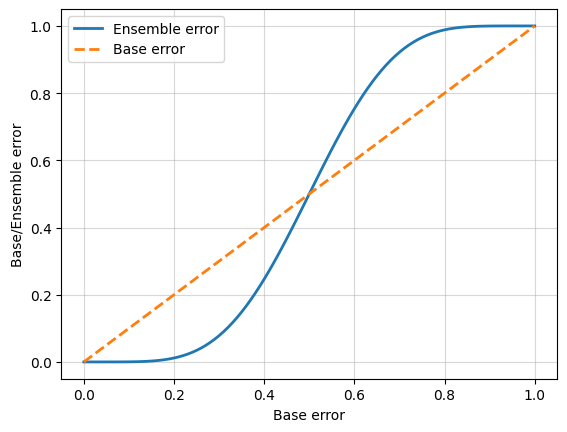

In [8]:
import numpy as np

error_range = np.arange(0.0, 1.01, 0.01)
ens_errors = [ensemble_error(n_classifier=11, error=error)
              for error in error_range]
import matplotlib.pyplot as plt

plt.plot(error_range, 
         ens_errors, 
         label='Ensemble error', 
         linewidth=2)

plt.plot(error_range, 
         error_range, 
         linestyle='--',
         label='Base error',
         linewidth=2)

plt.xlabel('Base error')
plt.ylabel('Base/Ensemble error')
plt.legend(loc='upper left')
plt.grid(alpha=0.5)
# plt.savefig('images/07_03.png', dpi=300)
plt.show()



# 다수결 투표를 사용한 분류 앙상블
## 간단한 다수결 투표 분류기 구현


In [9]:
import numpy as np

np.argmax(np.bincount([0, 0, 1], 
                      weights=[0.2, 0.2, 0.6]))


1

In [10]:
ex = np.array([[0.9, 0.1],
               [0.8, 0.2],
               [0.4, 0.6]])

p = np.average(ex, 
               axis=0, 
               weights=[0.2, 0.2, 0.6])
p


array([0.58, 0.42])

In [11]:
np.argmax(p)


0

In [12]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import numpy as np
import operator


class MajorityVoteClassifier(BaseEstimator, 
                             ClassifierMixin):
    """다수결 투표 앙상블 분류기

    매개변수
    ----------
    classifiers : 배열 타입, 크기 = [n_classifiers]
        앙상블에 사용할 분류기
    
    vote : str, {'classlabel', 'probability'}
        기본값: 'classlabel'
        'classlabel'이면 예측은 다수인 클래스 레이블의 인덱스가 됩니다
        'probability'면 확률 합이 가장 큰 인덱스로
        클래스 레이블을 예측합니다(보정된 분류기에 추천합니다)
    
    weights : 배열 타입, 크기 = [n_classifiers]
        선택 사항, 기본값: None
        'int' 또는 'float' 값의 리스트가 주어지면 분류기가 이 중요도로 가중치됩니다
        'weights=None'이면 동일하게 취급합니다

    """
    def __init__(self, classifiers, vote='classlabel', weights=None):

        self.classifiers = classifiers
        self.named_classifiers = {key: value for key, value
                                  in _name_estimators(classifiers)}
        self.vote = vote
        self.weights = weights

    def fit(self, X, y):
        """분류기를 학습합니다

        매개변수
        ----------
        X : {배열 타입, 희소 행렬},
            크기 = [n_samples, n_features]
            훈련 샘플 행렬
        
        y : 배열 타입, 크기 = [n_samples]
            타깃 클래스 레이블 벡터
            
        반환값
        -------
        self : 객체
        
        """
        if self.vote not in ('probability', 'classlabel'):
            raise ValueError("vote는 'probability' 또는 'classlabel'이어야 합니다"
                             "; (vote=%r)이 입력되었습니다."
                             % self.vote)

        if self.weights and len(self.weights) != len(self.classifiers):
            raise ValueError('분류기와 가중치 개수는 같아야 합니다'
                             '; 가중치 %d 개, 분류기 %d 개'
                             % (len(self.weights), len(self.classifiers)))

        # self.predict 메서드에서 np.argmax를 호출할 때
        # 클래스 레이블이 0부터 시작되어야 하므로 LabelEncoder를 사용합니다
        self.lablenc_ = LabelEncoder()
        self.lablenc_.fit(y)
        self.classes_ = self.lablenc_.classes_
        self.classifiers_ = []
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X, self.lablenc_.transform(y))
            self.classifiers_.append(fitted_clf)
        return self

    def predict(self, X):
        """X에 대한 클래스 레이블을 예측합니다

        매개변수
        ----------
        X : {배열 타입, 희소 행렬},
            크기 = [n_samples, n_features]
            샘플 데이터 행렬
        
        반환값
        ----------
        maj_vote : 배열 타입, 크기 = [n_samples]
            예측된 클래스 레이블
        
        """
        if self.vote == 'probability':
            maj_vote = np.argmax(self.predict_proba(X), axis=1)
        else:  # 'classlabel' 투표

            # clf.predict 메서드를 사용하여 결과를 모읍니다
            predictions = np.asarray([clf.predict(X)
                                      for clf in self.classifiers_]).T

            maj_vote = np.apply_along_axis(
                                      lambda x:
                                      np.argmax(np.bincount(x,
                                                weights=self.weights)),
                                      axis=1,
                                      arr=predictions)
        maj_vote = self.lablenc_.inverse_transform(maj_vote)
        return maj_vote

    def predict_proba(self, X):
        """X에 대한 클래스 확률을 예측합니다

        매개변수
        ----------
        X : {배열 타입, 희소 행렬},
            크기 = [n_samples, n_features]
            n_samples는 샘플의 개수고 n_features는 특성의 개수인
            샘플 데이터 행렬
        
        반환값
        ----------
        avg_proba : 배열 타입,
            크기 = [n_samples, n_classes]
            샘플마다 가중치가 적용된 클래스의 평균 확률
        
        """
        probas = np.asarray([clf.predict_proba(X)
                             for clf in self.classifiers_])
        avg_proba = np.average(probas, axis=0, weights=self.weights)
        return avg_proba

    def get_params(self, deep=True):
        """GridSearch를 위해 분류기의 매개변수 이름을 반환합니다"""
        if not deep:
            return super(MajorityVoteClassifier, self).get_params(deep=False)
        else:
            out = self.named_classifiers.copy()
            for name, step in self.named_classifiers.items():
                for key, value in step.get_params(deep=True).items():
                    out['%s__%s' % (name, key)] = value
            return out




## 다수결 투표 방식을 사용하여 예측 만들기


In [13]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X, y = iris.data[50:, [1, 2]], iris.target[50:]
le = LabelEncoder()
y = le.fit_transform(y)


In [14]:

X_train, X_test, y_train, y_test =\
       train_test_split(X, y, 
                        test_size=0.5, 
                        random_state=1,
                        stratify=y)


In [15]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

clf1 = LogisticRegression(penalty='l2', 
                          C=0.001,
                          random_state=1)

clf2 = DecisionTreeClassifier(max_depth=1,
                              criterion='entropy',
                              random_state=0)

clf3 = KNeighborsClassifier(n_neighbors=1,
                            p=2,
                            metric='minkowski')

pipe1 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf1]])
pipe3 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf3]])

clf_labels = ['Logistic regression', 'Decision tree', 'KNN']

print('10-겹 교차 검증:\n')
for clf, label in zip([pipe1, clf2, pipe3], clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))


10-겹 교차 검증:

ROC AUC: 0.92 (+/- 0.15) [Logistic regression]
ROC AUC: 0.87 (+/- 0.18) [Decision tree]
ROC AUC: 0.85 (+/- 0.13) [KNN]


# 다수결 (하드) 투표


In [16]:

mv_clf = MajorityVoteClassifier(classifiers=[pipe1, clf2, pipe3])

clf_labels += ['Majority voting']
all_clf = [pipe1, clf2, pipe3, mv_clf]

for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))


ROC AUC: 0.92 (+/- 0.15) [Logistic regression]
ROC AUC: 0.87 (+/- 0.18) [Decision tree]
ROC AUC: 0.85 (+/- 0.13) [KNN]
ROC AUC: 0.98 (+/- 0.05) [Majority voting]


사이킷런의 `VotingClassifier`를 사용해 보겠습니다. `estimators` 매개변수에는 분류기 이름과 객체로 구성된 튜플의 리스트를 입력합니다. 앞에서 만든 `MajorityVoteClassifier`는 `vote` 매개변수에 상관없이 `predict_proba` 메서드를 실행할 수 있지만 사이킷런의 `VotingClassifier`는 `voting='hard'`일 경우 `predict_proba` 메서드를 지원하지 않습니다. ROC AUC를 계산하기 위해서는 예측 확률이 필요하므로 `voting='soft'`로 지정합니다.


In [17]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=[
    ('lr', pipe1), ('dt', clf2), ('knn', pipe3)], voting='soft')

scores = cross_validate(estimator=vc, X=X_train, y=y_train, 
                        cv=10, scoring='roc_auc')
print("ROC AUC: : %0.2f (+/- %0.2f) [%s]"
      % (scores['test_score'].mean(), 
         scores['test_score'].std(), 'VotingClassifier'))


ROC AUC: : 0.98 (+/- 0.05) [VotingClassifier]


`VotingClassifier`의 `fit` 메서드를 호출할 때 진행 과정을 출력하려면 0.23버전에서 추가된 `verbose` 매개변수를 `True`로 지정해야 합니다. 여기에서는 앞서 만든 `vc` 객체의 `set_params` 메서드를 사용해 `verbose` 매개변수를 설정하겠습니다.


In [18]:
vc.set_params(verbose=True)


VotingClassifier(estimators=[('lr',
                              Pipeline(steps=[['sc', StandardScaler()],
                                              ['clf',
                                               LogisticRegression(C=0.001,
                                                                  random_state=1)]])),
                             ('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=1,
                                                     random_state=0)),
                             ('knn',
                              Pipeline(steps=[['sc', StandardScaler()],
                                              ['clf',
                                               KNeighborsClassifier(n_neighbors=1)]]))],
                 verbose=True, voting='soft')

In [19]:

vc = vc.fit(X_train, y_train)


[Voting] ....................... (1 of 3) Processing lr, total=   0.0s
[Voting] ....................... (2 of 3) Processing dt, total=   0.0s
[Voting] ...................... (3 of 3) Processing knn, total=   0.0s


`voting='soft'`일 때 `predict` 메서드는 `predict_proba` 메서드에서 얻은 가장 큰 확률의 클래스를 예측으로 삼습니다. `predict_proba` 메서드는 각 분류기의 클래스 확률을 평균합니다.


In [20]:
vc.predict_proba(X_test[:10])


array([[0.80858947, 0.19141053],
       [0.80798659, 0.19201341],
       [0.80742142, 0.19257858],
       [0.81176637, 0.18823363],
       [0.81195778, 0.18804222],
       [0.17701319, 0.82298681],
       [0.17670572, 0.82329428],
       [0.17845724, 0.82154276],
       [0.1796252 , 0.8203748 ],
       [0.81076201, 0.18923799]])


# 앙상블 분류기의 평가와 튜닝


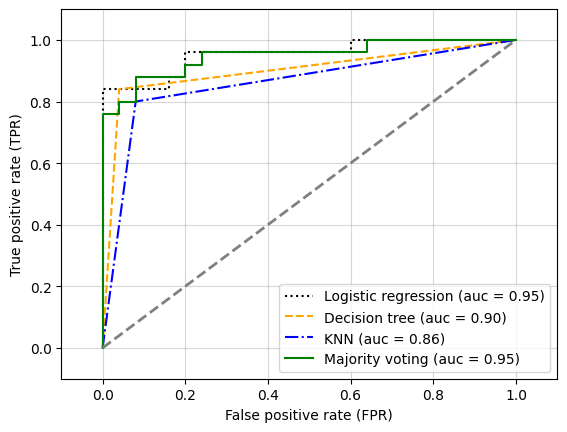

In [21]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']
for clf, label, clr, ls \
        in zip(all_clf,
               clf_labels, colors, linestyles):

    # 양성 클래스의 레이블이 1이라고 가정합니다
    y_pred = clf.fit(X_train,
                     y_train).predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')


# plt.savefig('images/07_04', dpi=300)
plt.show()


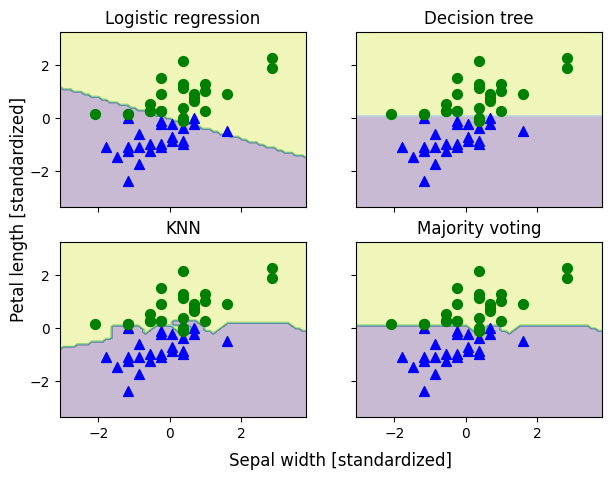

In [22]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
from itertools import product

all_clf = [pipe1, clf2, pipe3, mv_clf]

x_min = X_train_std[:, 0].min() - 1
x_max = X_train_std[:, 0].max() + 1
y_min = X_train_std[:, 1].min() - 1
y_max = X_train_std[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(nrows=2, ncols=2, 
                        sharex='col', 
                        sharey='row', 
                        figsize=(7, 5))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        all_clf, clf_labels):
    clf.fit(X_train_std, y_train)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.3)
    
    axarr[idx[0], idx[1]].scatter(X_train_std[y_train==0, 0], 
                                  X_train_std[y_train==0, 1], 
                                  c='blue', 
                                  marker='^',
                                  s=50)
    
    axarr[idx[0], idx[1]].scatter(X_train_std[y_train==1, 0], 
                                  X_train_std[y_train==1, 1], 
                                  c='green', 
                                  marker='o',
                                  s=50)
    
    axarr[idx[0], idx[1]].set_title(tt)

plt.text(-3.5, -5., 
         s='Sepal width [standardized]', 
         ha='center', va='center', fontsize=12)
plt.text(-12.5, 4.5, 
         s='Petal length [standardized]', 
         ha='center', va='center', 
         fontsize=12, rotation=90)

# plt.savefig('images/07_05', dpi=300)
plt.show()


In [23]:
mv_clf.get_params()


{'pipeline-1': Pipeline(steps=[('sc', StandardScaler()),
                 ['clf', LogisticRegression(C=0.001, random_state=1)]]),
 'decisiontreeclassifier': DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0),
 'pipeline-2': Pipeline(steps=[('sc', StandardScaler()),
                 ['clf', KNeighborsClassifier(n_neighbors=1)]]),
 'pipeline-1__memory': None,
 'pipeline-1__steps': [('sc', StandardScaler()),
  ['clf', LogisticRegression(C=0.001, random_state=1)]],
 'pipeline-1__verbose': False,
 'pipeline-1__sc': StandardScaler(),
 'pipeline-1__clf': LogisticRegression(C=0.001, random_state=1),
 'pipeline-1__sc__copy': True,
 'pipeline-1__sc__with_mean': True,
 'pipeline-1__sc__with_std': True,
 'pipeline-1__clf__C': 0.001,
 'pipeline-1__clf__class_weight': None,
 'pipeline-1__clf__dual': False,
 'pipeline-1__clf__fit_intercept': True,
 'pipeline-1__clf__intercept_scaling': 1,
 'pipeline-1__clf__l1_ratio': None,
 'pipeline-1__clf__max_iter': 100,
 'pipeline-1__clf__m

In [24]:
from sklearn.model_selection import GridSearchCV


params = {'decisiontreeclassifier__max_depth': [1, 2],
          'pipeline-1__clf__C': [0.001, 0.1, 100.0]}

grid = GridSearchCV(estimator=mv_clf,
                    param_grid=params,
                    cv=10,
                    scoring='roc_auc')
grid.fit(X_train, y_train)


GridSearchCV(cv=10,
             estimator=MajorityVoteClassifier(classifiers=[Pipeline(steps=[('sc',
                                                                            StandardScaler()),
                                                                           ['clf',
                                                                            LogisticRegression(C=0.001,
                                                                                               random_state=1)]]),
                                                           DecisionTreeClassifier(criterion='entropy',
                                                                                  max_depth=1,
                                                                                  random_state=0),
                                                           Pipeline(steps=[('sc',
                                                                            StandardScaler()),
                                                                           ['clf',
                                                                            KNeighborsClassifier(n_neighbors=1)]])]),
             param_grid={'decisiontreeclassifier__max_depth': [1, 2],
                         'pipeline-1__clf__C': [0.001, 0.1, 100.0]},
             scoring='roc_auc')

In [25]:

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_['mean_test_score'][r], 
             grid.cv_results_['std_test_score'][r] / 2.0, 
             grid.cv_results_['params'][r]))


0.983 +/- 0.02 {'decisiontreeclassifier__max_depth': 1, 'pipeline-1__clf__C': 0.001}
0.983 +/- 0.02 {'decisiontreeclassifier__max_depth': 1, 'pipeline-1__clf__C': 0.1}
0.967 +/- 0.05 {'decisiontreeclassifier__max_depth': 1, 'pipeline-1__clf__C': 100.0}
0.983 +/- 0.02 {'decisiontreeclassifier__max_depth': 2, 'pipeline-1__clf__C': 0.001}
0.983 +/- 0.02 {'decisiontreeclassifier__max_depth': 2, 'pipeline-1__clf__C': 0.1}
0.967 +/- 0.05 {'decisiontreeclassifier__max_depth': 2, 'pipeline-1__clf__C': 100.0}


In [26]:
print('최적의 매개변수: %s' % grid.best_params_)
print('정확도: %.2f' % grid.best_score_)


최적의 매개변수: {'decisiontreeclassifier__max_depth': 1, 'pipeline-1__clf__C': 0.001}
정확도: 0.98



`GridSearchCV`의 `refit` 기본값은 `True`입니다(즉, `GridSeachCV(..., refit=True)`). 훈련된 `GridSearchCV` 추정기를 사용해 `predict` 메서드로 예측을 만들 수 있다는 뜻입니다. 예를 들면:
    grid = GridSearchCV(estimator=mv_clf, 
                        param_grid=params, 
                        cv=10, 
                        scoring='roc_auc')
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)

또한 `best_estimator_` 속성으로 "최상"의 추정기를 얻을 수 있습니다.
grid.best_estimator_.classifiers
mv_clf = grid.best_estimator_
mv_clf.set_params(**grid.best_estimator_.get_params())
mv_clf
사이킷런 0.22버전에서 `StackingClassifier`와 `StackingRegressor`가 추가되었습니다. 앞서 만든 분류기를 사용해 `StackingClassifier`에 그리드 서치를 적용해 보겠습니다. `StackingClassifier`는 `VotingClassifier`와 비슷하게 `estimators` 매개변수로 분류기 이름과 객체로 구성된 튜플의 리스트를 입력받습니다. `final_estimator` 매개변수로는 최종 결정을 위한 분류기를 지정합니다. 매개변수 그리드를 지정할 때는 튜플에 사용한 분류기 이름을 접두사로 사용합니다.


In [ ]:
from sklearn.ensemble import StackingClassifier

stack = StackingClassifier(estimators=[
    ('lr', pipe1), ('dt', clf2), ('knn', pipe3)],
                           final_estimator=LogisticRegression())

params = {'dt__max_depth': [1, 2],
          'lr__clf__C': [0.001, 0.1, 100.0]}

grid = GridSearchCV(estimator=stack,
                    param_grid=params,
                    cv=10,
                    scoring='roc_auc')
grid.fit(X_train, y_train)


GridSearchCV(cv=10,
             estimator=StackingClassifier(estimators=[('lr',
                                                       Pipeline(steps=[('sc',
                                                                        StandardScaler()),
                                                                       ['clf',
                                                                        LogisticRegression(C=0.001,
                                                                                           random_state=1)]])),
                                                      ('dt',
                                                       DecisionTreeClassifier(criterion='entropy',
                                                                              max_depth=1,
                                                                              random_state=0)),
                                                      ('knn',
                                                       Pipeline(steps=[('sc',
                                                                        StandardScaler()),
                                                                       ['clf',
                                                                        KNeighborsClassifier(n_neighbors=1)]]))],
                                          final_estimator=LogisticRegression()),
             param_grid={'dt__max_depth': [1, 2],
                         'lr__clf__C': [0.001, 0.1, 100.0]},
             scoring='roc_auc')

In [ ]:

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_['mean_test_score'][r], 
             grid.cv_results_['std_test_score'][r] / 2.0, 
             grid.cv_results_['params'][r]))
print('최적의 매개변수: %s' % grid.best_params_)
print('정확도: %.2f' % grid.best_score_)


0.950 +/- 0.07 {'dt__max_depth': 1, 'lr__clf__C': 0.001}
0.983 +/- 0.02 {'dt__max_depth': 1, 'lr__clf__C': 0.1}
0.967 +/- 0.05 {'dt__max_depth': 1, 'lr__clf__C': 100.0}
0.950 +/- 0.07 {'dt__max_depth': 2, 'lr__clf__C': 0.001}
0.983 +/- 0.02 {'dt__max_depth': 2, 'lr__clf__C': 0.1}
0.967 +/- 0.05 {'dt__max_depth': 2, 'lr__clf__C': 100.0}
최적의 매개변수: {'dt__max_depth': 1, 'lr__clf__C': 0.1}
정확도: 0.98



# 배깅: 부트스트랩 샘플링을 통한 분류 앙상블


In [ ]:
Image(url='https://git.io/Jtsk4', width=500) 


## 배깅 알고리즘의 작동 방식


In [ ]:
Image(url='https://git.io/JtskB', width=400) 

## 배깅으로 Wine 데이터셋의 샘플 분류


In [27]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']


In [ ]:

# UCI 머신 러닝 저장소에서 Wine 데이터셋을 다운로드할 수 없을 때
# 다음 주석을 해제하고 로컬 경로에서 데이터셋을 적재하세요:

# df_wine = pd.read_csv('wine.data', header=None)


In [28]:

# 클래스 1 제외
df_wine = df_wine[df_wine['Class label'] != 1]

y = df_wine['Class label'].values
X = df_wine[['Alcohol', 'OD280/OD315 of diluted wines']].values


In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test =\
            train_test_split(X, y, 
                             test_size=0.2, 
                             random_state=1,
                             stratify=y)


In [30]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=None,
                              random_state=1)

bag = BaggingClassifier(base_estimator=tree,
                        n_estimators=500, 
                        max_samples=1.0, 
                        max_features=1.0, 
                        bootstrap=True, 
                        bootstrap_features=False, 
                        n_jobs=1, 
                        random_state=1)


In [31]:
from sklearn.metrics import accuracy_score

tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('결정 트리의 훈련 정확도/테스트 정확도 %.3f/%.3f'
      % (tree_train, tree_test))


결정 트리의 훈련 정확도/테스트 정확도 1.000/0.833


In [32]:

bag = bag.fit(X_train, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)

bag_train = accuracy_score(y_train, y_train_pred) 
bag_test = accuracy_score(y_test, y_test_pred) 
print('배깅의 훈련 정확도/테스트 정확도 %.3f/%.3f'
      % (bag_train, bag_test))


C:\Users\YHS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


배깅의 훈련 정확도/테스트 정확도 1.000/0.917


C:\Users\YHS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


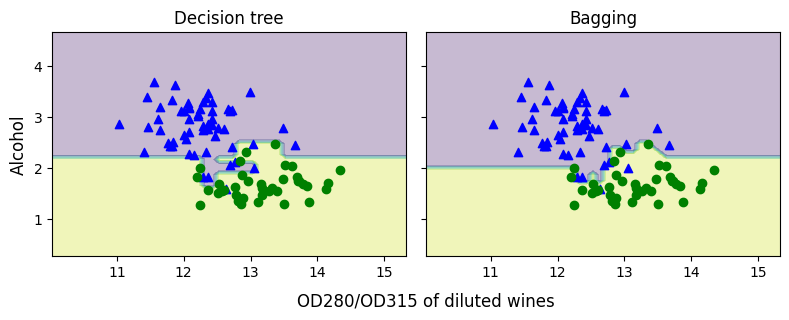

In [33]:
import numpy as np
import matplotlib.pyplot as plt

x_min = X_train[:, 0].min() - 1
x_max = X_train[:, 0].max() + 1
y_min = X_train[:, 1].min() - 1
y_max = X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(nrows=1, ncols=2, 
                        sharex='col', 
                        sharey='row', 
                        figsize=(8, 3))


for idx, clf, tt in zip([0, 1],
                        [tree, bag],
                        ['Decision tree', 'Bagging']):
    clf.fit(X_train, y_train)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx].scatter(X_train[y_train == 0, 0],
                       X_train[y_train == 0, 1],
                       c='blue', marker='^')

    axarr[idx].scatter(X_train[y_train == 1, 0],
                       X_train[y_train == 1, 1],
                       c='green', marker='o')

    axarr[idx].set_title(tt)

axarr[0].set_ylabel('Alcohol', fontsize=12)

plt.tight_layout()
plt.text(0, -0.2,
         s='OD280/OD315 of diluted wines',
         ha='center',
         va='center',
         fontsize=12,
         transform=axarr[1].transAxes)

# plt.savefig('images/07_08.png', dpi=300, bbox_inches='tight')
plt.show()


랜덤 포레스트와 배깅은 모두 기본적으로 부트스트랩 샘플링을 사용하기 때문에 분류기마다 훈련에 사용하지 않는 여분의 샘플이 남습니다. 이를 OOB(out of bag) 샘플이라고 합니다. 이를 사용하면 검증 세트를 만들지 않고 앙상블 모델을 평가할 수 있습니다. 사이킷런에서는 `oob_score` 매개변수를 `True`로 설정하면 됩니다. 이 매개변수의 기본값은 `False`입니다.
사이킷런의 랜덤 포레스트는 분류일 경우 OOB 샘플에 대한 각 트리의 예측 확률을 누적하여 가장 큰 확률을 가진 클래스를 타깃과 비교하여 정확도를 계산합니다. 회귀일 경우에는 각 트리의 예측 평균에 대한 R2 점수를 계산합니다. 이 점수는 `oob_score_` 속성에 저장되어 있습니다. `RandomForestClassifier`에 Wine 데이터셋을 적용하여 OOB 점수를 계산해 보겠습니다.


In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(oob_score=True,
                            random_state=1)
rf.fit(X_train, y_train)

rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print('랜덤 포레스트의 훈련 정확도/테스트 정확도 %.3f/%.3f' % 
      (rf_train_score, rf_test_score))
print('랜덤 포레스트의 OOB 정확도 %.3f' % rf.oob_score_)


랜덤 포레스트의 훈련 정확도/테스트 정확도 1.000/0.917
랜덤 포레스트의 OOB 정확도 0.884


배깅의 OOB 점수 계산 방식은 랜덤 포레스트와 거의 동일합니다. 다만 `base_estimator`에 지정된 분류기가 `predict_proba` 메서드를 지원하지 않을 경우 예측 클래스를 카운팅하여 가장 높은 값의 클래스를 사용해 정확도를 계산합니다. 본문에서 만든 것과 동일한 `BaggingClassifier` 모델를 만들고 OOB 점수를 계산해 보겠습니다.


In [35]:
bag = BaggingClassifier(base_estimator=tree,
                        n_estimators=500,
                        oob_score=True,
                        random_state=1)
bag.fit(X_train, y_train)

bag_train_score = bag.score(X_train, y_train)
bag_test_score = bag.score(X_test, y_test)
print('배깅의 훈련 정확도/테스트 정확도 %.3f/%.3f' % 
      (bag_train_score, bag_test_score))
print('배깅의 OOB 정확도 %.3f' % bag.oob_score_)


C:\Users\YHS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


배깅의 훈련 정확도/테스트 정확도 1.000/0.917
배깅의 OOB 정확도 0.895



# 약한 학습기를 이용한 에이다부스트
## 부스팅 작동 원리


In [36]:
Image(url='https://git.io/Jtsk0', width=400) 


In [37]:
Image(url='https://git.io/Jtskg', width=500) 


## 사이킷런에서 에이다부스트 사용


In [38]:
from sklearn.ensemble import AdaBoostClassifier

tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=1,
                              random_state=1)

ada = AdaBoostClassifier(base_estimator=tree,
                         n_estimators=500, 
                         learning_rate=0.1,
                         random_state=1)
tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('결정 트리의 훈련 정확도/테스트 정확도 %.3f/%.3f'
      % (tree_train, tree_test))


결정 트리의 훈련 정확도/테스트 정확도 0.916/0.875


In [39]:

ada = ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

ada_train = accuracy_score(y_train, y_train_pred) 
ada_test = accuracy_score(y_test, y_test_pred) 
print('에이다부스트의 훈련 정확도/테스트 정확도 %.3f/%.3f'
      % (ada_train, ada_test))


C:\Users\YHS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


에이다부스트의 훈련 정확도/테스트 정확도 1.000/0.917


C:\Users\YHS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


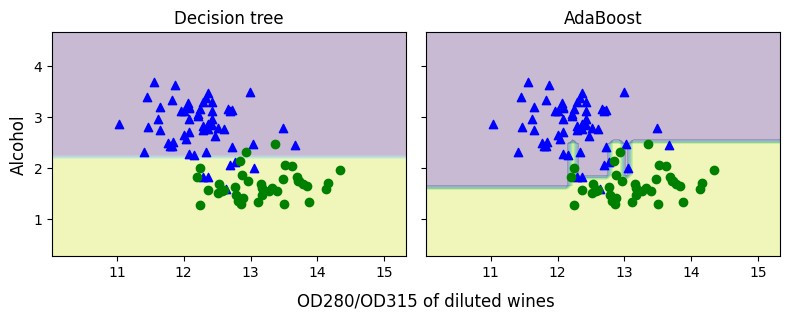

In [40]:
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(8, 3))


for idx, clf, tt in zip([0, 1],
                        [tree, ada],
                        ['Decision tree', 'AdaBoost']):
    clf.fit(X_train, y_train)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx].scatter(X_train[y_train == 0, 0],
                       X_train[y_train == 0, 1],
                       c='blue', marker='^')
    axarr[idx].scatter(X_train[y_train == 1, 0],
                       X_train[y_train == 1, 1],
                       c='green', marker='o')
    axarr[idx].set_title(tt)

axarr[0].set_ylabel('Alcohol', fontsize=12)

plt.tight_layout()
plt.text(0, -0.2,
         s='OD280/OD315 of diluted wines',
         ha='center',
         va='center',
         fontsize=12,
         transform=axarr[1].transAxes)

# plt.savefig('images/07_11.png', dpi=300, bbox_inches='tight')
plt.show()


그레이디언트 부스팅은 에이다부스트와는 달리 이전의 약한 학습기가 만든 잔차 오차(residual error)에 대해 학습하는 새로운 학습기를 추가합니다. 신경망 알고리즘이 잘 맞는 이미지, 텍스트 같은 데이터를 제외하고 구조적인 데이터셋에서 현재 가장 높은 성능을 내는 알고리즘 중 하나입니다. 사이킷런에는 `GradientBoostingClassifier`와 `GradientBoostingRegressor` 클래스로 구현되어 있습니다. 앞에서 사용한 훈련 데이터를 이용하여 그레이디언트 부스팅 모델을 훈련시켜 보죠.


In [41]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(n_estimators=20, random_state=42)
gbrt.fit(X_train, y_train)

gbrt_train_score = gbrt.score(X_train, y_train)
gbrt_test_score = gbrt.score(X_test, y_test)
print('그래디언트 부스팅의 훈련 정확도/테스트 정확도 %.3f/%.3f' 
      % (gbrt_train_score, gbrt_test_score))


그래디언트 부스팅의 훈련 정확도/테스트 정확도 1.000/0.917


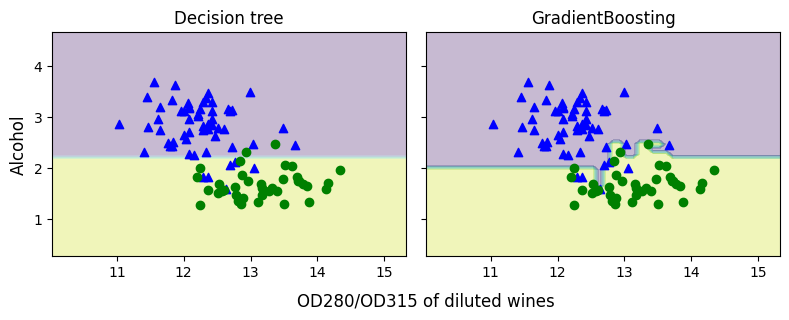

In [42]:
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(8, 3))


for idx, clf, tt in zip([0, 1],
                        [tree, gbrt],
                        ['Decision tree', 'GradientBoosting']):
    clf.fit(X_train, y_train)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx].scatter(X_train[y_train == 0, 0],
                       X_train[y_train == 0, 1],
                       c='blue', marker='^')
    axarr[idx].scatter(X_train[y_train == 1, 0],
                       X_train[y_train == 1, 1],
                       c='green', marker='o')
    axarr[idx].set_title(tt)

axarr[0].set_ylabel('Alcohol', fontsize=12)

plt.tight_layout()
plt.text(0, -0.2,
         s='OD280/OD315 of diluted wines',
         ha='center', va='center', fontsize=12,
         transform=axarr[1].transAxes)

# plt.savefig('images/07_gradientboosting.png', dpi=300, bbox_inches='tight')
plt.show()


그레이디언트 부스팅에서 중요한 매개변수 중 하나는 각 트리가 오차에 기여하는 정도를 조절하는 `learning_rate`입니다. `learning_rate`이 작으면 성능은 높아지지만 많은 트리가 필요합니다. 이 매개변수의 기본값은 0.1입니다.

그레이디언트 부스팅이 사용하는 손실 함수는 `loss` 매개변수에서 지정합니다. `GradientBoostingClassifier`일 경우 로지스틱 회귀를 의미하는 `'deviance'`, `GradientBoostingRegressor`일 경우 최소 제곱을 의미하는 `'ls'`가 기본값입니다.

그레이디언트 부스팅이 오차를 학습하기 위해 사용하는 학습기는 `DecisionTreeRegressor`입니다. `DecisionTreeRegressor`의 불순도 조건은 `'mse'`, `'mae'` 등 입니다. 따라서 그레이디언트 부스팅의 `criterion` 매개변수도 `DecisionTreeRegressor`의 불순도 조건을 따라서 `'mse'`, `'mae'`, 그리고 제롬 H. 프리드먼(Jerome H. Friedman)이 제안한 MSE 버전인 `'friedman_mse'`(기본값)를 사용합니다. 하지만 `'mae'`일 경우 그레이디언트 부스팅의 결과가 좋지 않기 때문에 이 옵션은 사이킷런 0.24버전부터 경고가 발생하고 0.26버전에서 삭제될 예정입니다.

`subsample` 매개변수를 기본값 1.0 보다 작은 값으로 지정하면 훈련 데이터셋에서 `subsample` 매개변수에 지정된 비율만큼 랜덤하게 샘플링하여 트리를 훈련합니다. 이를 확률적 그레이디언트 부스팅이라고 부릅니다. 이는 랜덤 포레스트나 에이다부스트의 부트스트랩 샘플링과 비슷하게 과대적합을 줄이는 효과를 냅니다. 또한 남은 샘플을 사용해 OOB 점수를 계산할 수 있습니다. `subsample` 매개변수가 1.0보다 작을 때 그레이디언트 부스팅 객체의 `oob_improvement_` 속성에 이전 트리의 OOB 손실 값에서 현재 트리의 OOB 손실을 뺀 값이 기록되어 있습니다. 이 값에 음수를 취해서 누적하면 트리가 추가되면서 과대적합되는 지점을 찾을 수 있습니다.


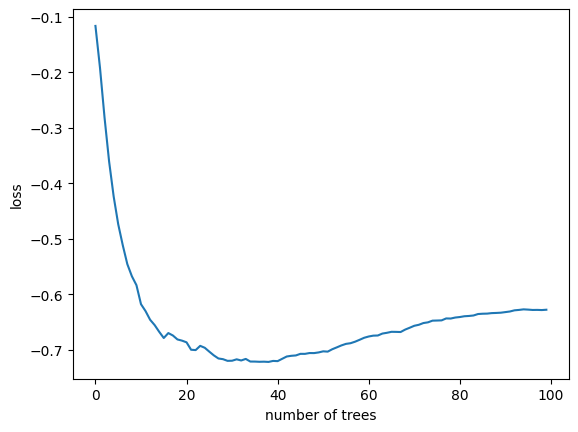

In [43]:
gbrt = GradientBoostingClassifier(n_estimators=100, 
                                  subsample=0.5,
                                  random_state=1)
gbrt.fit(X_train, y_train)
oob_loss = np.cumsum(-gbrt.oob_improvement_)
plt.plot(range(100), oob_loss)
plt.xlabel('number of trees')
plt.ylabel('loss')

# plt.savefig('images/07_oob_improvement.png', dpi=300)
plt.show()


사이킷런 0.20 버전부터는 그레이디언트 부스팅에 조기 종료(early stopping) 기능을 지원하기 위한 매개변수 `n_iter_no_change`, `validation_fraction`, `tol`이 추가되었습니다. 훈련 데이터에서 `validation_fraction` 비율(기본값 0.1)만큼 떼어 내어 측정한 손실이 `n_iter_no_change` 반복 동안에 `tol` 값(기본값 1e-4) 이상 향상되지 않으면 훈련이 멈춥니다.

히스토그램 기반 부스팅은 입력 특성을 256개의 구간으로 나누어 노드를 분할에 사용합니다. 일반적으로 샘플 개수가 10,000개보다 많은 경우 그레이디언트 부스팅보다 히스토그램 기반 부스팅이 훨씬 빠릅니다. 앞에서와 같은 데이터를 히스토그램 기반 부스팅 구현인 `HistGradientBoostingClassifier`에 적용해 보겠습니다. 이 클래스는 아직 실험적이기 때문에 사용하기 전에 먼저 활성화 해야 합니다.


In [44]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
 
hgbc = HistGradientBoostingClassifier(random_state=1)
hgbc.fit(X_train, y_train)

hgbc_train_score = gbrt.score(X_train, y_train)
hgbc_test_score = gbrt.score(X_test, y_test)
print('그래디언트 부스팅 훈련 정확도/테스트 정확도 %.3f/%.3f'
      % (hgbc_train_score, hgbc_test_score))


C:\Users\YHS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


그래디언트 부스팅 훈련 정확도/테스트 정확도 1.000/0.917


사이킷런 0.24버전부터 `HistGradientBoostingClassifier`와 `HistGradientBoostingRegressor`에서 범주형 특성을 그대로 사용할 수 있습니다. `categorical_features` 매개변수에 불리언 배열이나 정수 인덱스 배열을 전달하여 범주형 특성을 알려주어야 합니다.

XGBoost(https://xgboost.ai/)에서도 `tree_method` 매개변수를 `'hist'`로 지정하여 히스토그램 기반 부스팅을 사용할 수 있습니다. 코랩에는 이미 XGBoost 라이브러리가 설치되어 있으므로 간단히 테스트해 볼 수 있습니다.


In [45]:
from xgboost import XGBClassifier

xgb = XGBClassifier(tree_method='hist', random_state=1)
xgb.fit(X_train, y_train)

xgb_train_score = xgb.score(X_train, y_train)
xgb_test_score = xgb.score(X_test, y_test)

print('XGBoost 훈련 정확도/테스트 정확도 %.3f/%.3f'
      % (xgb_train_score, xgb_test_score))


XGBoost 훈련 정확도/테스트 정확도 0.979/0.917


또 다른 인기 높은 히스토그램 기반 부스팅 알고리즘은 마이크로소프트에서 만든 LightGBM(https://lightgbm.readthedocs.io/)입니다. 사실 사이킷런의 히스토그램 기반 부스팅은 LightGBM에서 영향을 많이 받았습니다. LightGBM도 코랩에서 바로 테스트해 볼 수 있습니다.


In [48]:
%pip install lightgbm

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: C:\Users\YHS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



     ---------------------------------------- 1.0/1.0 MB 5.9 MB/s eta 0:00:00


In [49]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state=1)
lgb.fit(X_train, y_train)

lgb_train_score = lgb.score(X_train, y_train)
lgb_test_score = lgb.score(X_test, y_test)

print('LightGBM 훈련 정확도/테스트 정확도 %.3f/%.3f'
      % (lgb_train_score, lgb_test_score))

LightGBM 훈련 정확도/테스트 정확도 0.979/0.917
